In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# For splitting data and tuning
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import *

# ML Models/ Algorithms
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Faster autocomplete
%config Completer.use_jedi = False

In [ ]:
data=pd.read_csv('../input/iris-flower-dataset/IRIS.csv')
data.head()

# **Basic Analysis**

In [ ]:
data.info(10)

In [ ]:
np.transpose(data.describe())

In [ ]:
print('Number of unique values')
data.nunique()

In [ ]:
print("Number of missing values")
data.isnull().sum()

# **A few plots**

In [ ]:
sns.set_palette('Set2')
sns.pairplot(data,hue="species",markers=["o", "s", "d"],diag_kind='kde',height=1.75,palette='magma_r')

In [ ]:
plt.figure(figsize=(10,5)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

##### Always remember that correlation is not causality. MEME example
https://pbs.twimg.com/media/EjKw4aZXgAEvTUA?format=jpg&name=small

In [ ]:
data.hist(edgecolor='orange',linewidth=3,bins=10,legend=True,facecolor='black')
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

# **Problem Type ?**
## What kind of ML Model should we build? Classification or Regression? And Why? Open Question...

# **Processing our data, Modelling and Evaluation**
## Finding our Target variable
## Splitting Data 
## Performance metrics

In [ ]:
data.head()

In [ ]:
data['species'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder
X=data.drop('species',axis=1)
Y=data['species']

Encoder=LabelEncoder()
Y=Encoder.fit_transform(Y)
Y

In [ ]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=2021)
# test_size=0.2 refers to the fact that we will be using only 80 percent data to train and 20 percent data to test our model.
# In real life, only train data is given to us. We then either train on entire dataset or make validation sets and then 
# use the trained model to make predictions on the test data that is not not known by us.
# Since this is an introductory class I will not go into depth
# interested students can check and search the following terms
### Cross validation, Overfitting and underfitting, Bias and Variance in datasets, Feature Engineering in ML....
### Resources will be shared soon...

In [ ]:
# X = train + test 
X.shape,Y.shape,x_train.shape,x_test.shape

# Before we proceed further let us get an overview of different ML Algorithms and some performance Measures/Metrics
## **Algorithms**
### Logistic Regression
### Decision Tree
### Random Forest
### SVM- SVC
### Naive Bayes
### Other Algorithms

## **Performance Metrics**
### True Positive,True Negative, False Positive, False Negative
### Precision
### Recall
### F1-Score
### AUC-ROC 
### Kappa Measure

#### Linear vs Logistic Explained
https://rajputhimanshu.files.wordpress.com/2018/03/linear_vs_logistic_regression.jpg

### Logistic Regression
<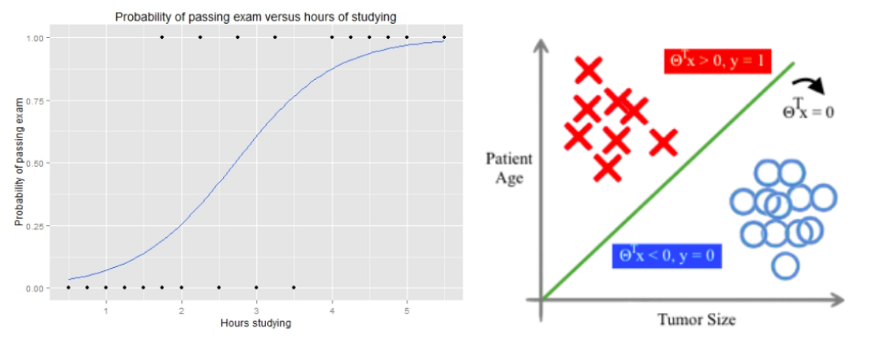>
##### Based on the concept of maximum likelihood. In simple words Logitic classifier uses an activation function known as the sigmoid function that scales the probabilities of an event between zero and one. Now a threshold is set. All values above and below the threshold belong to the respective classes.
#### Possible doubt: How will we use Logistic classifier for more than two classes?
##### In case of more than one class, the class that is predicted to have the highest probability is considered as the predicted class. SImilar to the two class approach. Interested students can read more about Maximum Likelihood Estimation and Gradient Descent. Gradient Descent will be much clearer once we dive into Neural Networks.

### Decision Tree
##### A tree is buit using simple statements to further classify the data points using True/ false or yes/ no or other similar labels. A root node is first selected based on purity/impurity. The node with the highest purity is selected and this process is further repated. The purity or impurity of a node is calculated using the Gini Index, Information Gain and Entropy. Here we will discuss only Gini index.
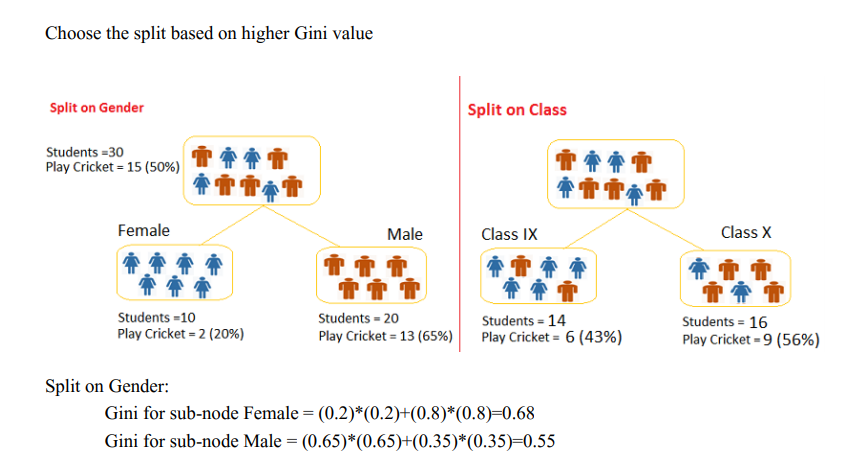
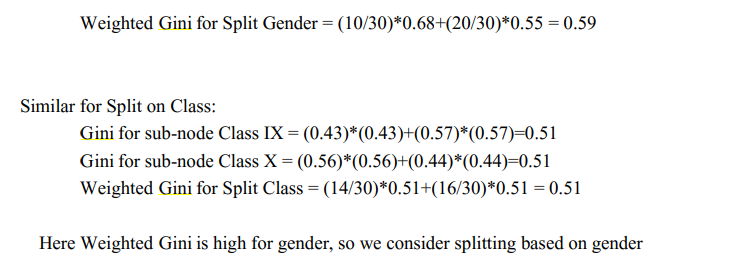
##### How decsion tree is used in petal classification
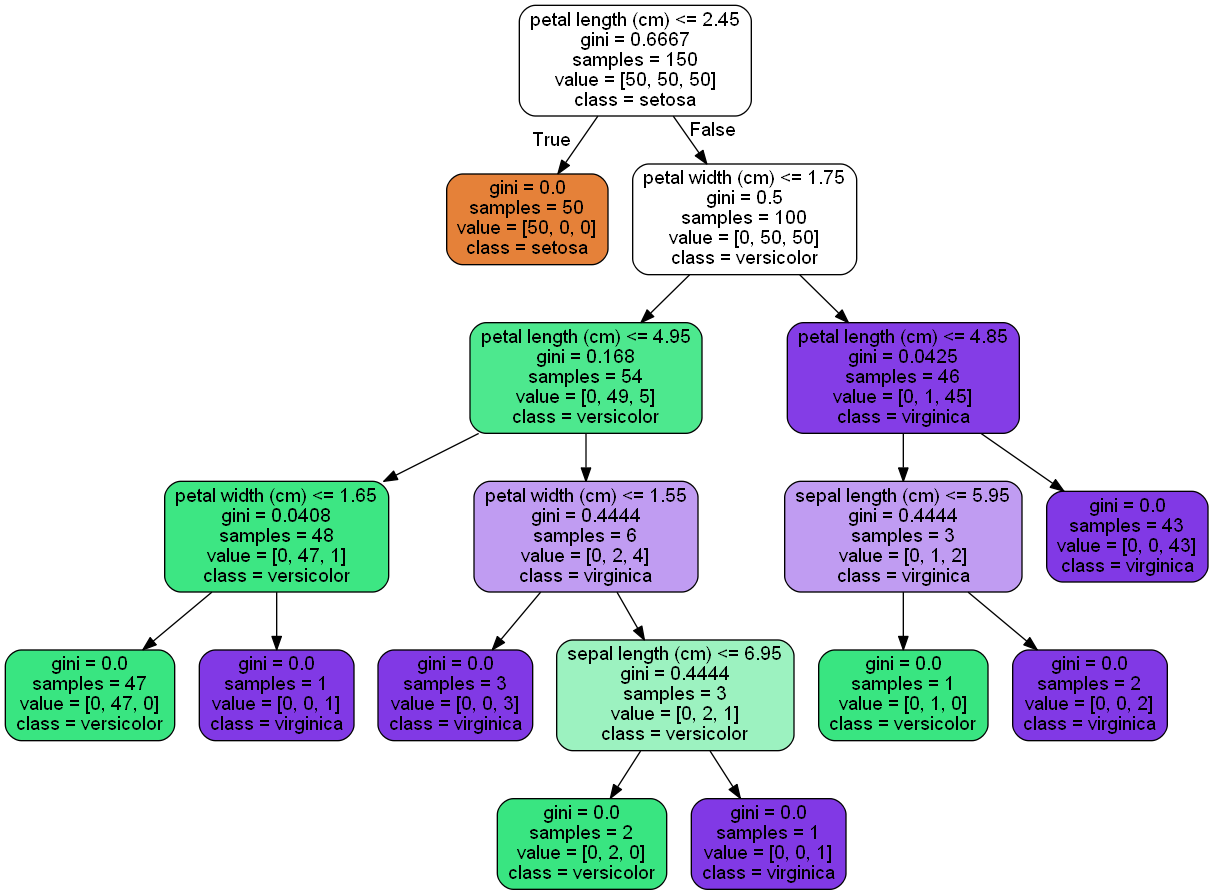

### Random Forest
##### One downside of Decsion tree is that it is very sensitive to training data. in order to overcome this, what we do is we simple create 100's of trees. To create a random forest we first randomly slect data points from the original dataset and create new dataset called as the bootstrapped dataset. This new dataset may or may not have some of the original data points nut it's size remain same as the original dataset ( If the OG dataset has 100 rows the new dataset will also have 100 rows as duplication is allowed). Now we have our bootstrapped dataset. Now multiple tress are created by randomly slecting features and final prediction is made by taking the majority vote of all trees.
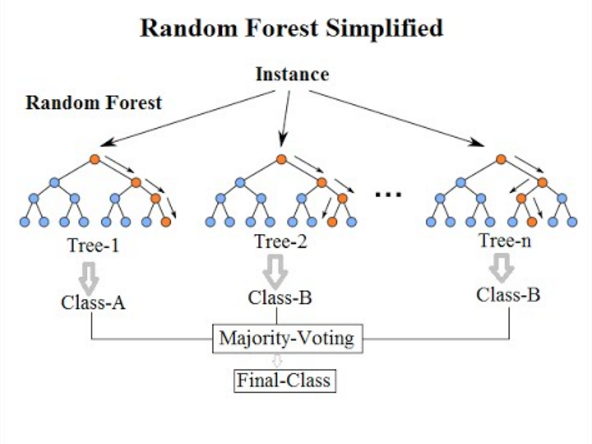
### SVM- SVC
##### Support vector machine classifier uses hyperplanes to seperate data point belonging to different classes. For 2D data you may use a simple line that seperates classes or else the SVM internally uses n-Dimensional hyperplanes.
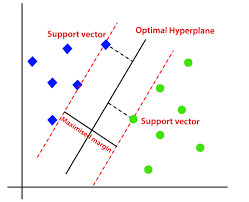
### Naive Bayes
##### Based on Bayes theorem. Sklearn has many variations of this like the Multinomial, gauissian, Bernoulli version. In it's true essence the naive bayes theorem relies on probability of events that are calculated in the train dataset and then uses these probabilities to make predictions. The Gaussian NB is widely used. (It assumes that the data follows normal distribution) meaning the model will try and fit your data to a normal distribution. Example: If you want to predict tomorrows weather using tempearature data. You will use probabilities of a range of tempearture given that it rained in the past, probability of a certain range of temperature and probability of rain in the past.

## These were some of the basic ML algorithms, I would request the particpants to explore more models like XGBoost, gradient Boosting, AdaBoost, LightGBM,....algorithms.

##### Bayes Theorem
https://www.kdnuggets.com/wp-content/uploads/bayes-nagesh-1.jpg
##### Hyperplanes 
https://lh5.googleusercontent.com/jpbUHBk4NhqoWBDT7hft7oFqsAkHyqyqpPm57HbjwfACPnXefsBaCtc12z4dD_uGisnAlCY-ZzR6q2DN-AZomUed5ZCZWcs9fMIvw7Qr_BeMg9JOru14pypqH50y5aZbE7p05gFO

# **Performance metrics**
#### True Positives (TP) - These are the correctly predicted positive values that mean that the actual class's value is yes and the value of the predicted class is also yes.

#### True Negatives (TN) - These are the correctly predicted negative values that mean that the actual class's value is no and value of the predicted class is also no.

#### False positives and false negatives. These values occur when your actual class contradicts the predicted class.
#### False Positives (FP) – When the actual class is no, and the predicted class is yes.
#### False Negatives (FN) – When actual class is yes, but predicted class is no.

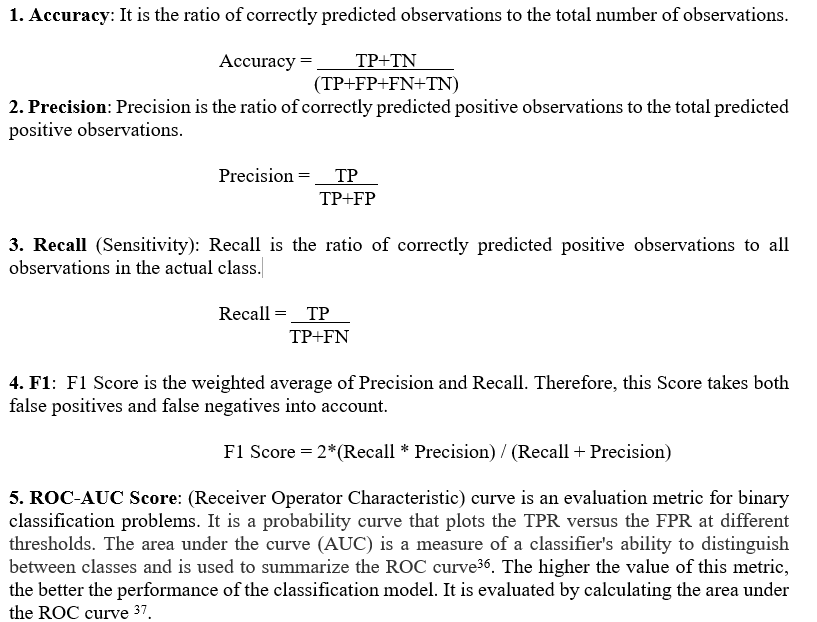

##### Confusion Matrix
https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg
##### Extending the logic to N classes
https://miro.medium.com/max/1354/0*yk9_1le_IUqeo-ZU.png

In [ ]:
import scikitplot as skplt
# class_names=["Virginica":"0","Setosa":"1","Versicolor":"2"]
model1=LogisticRegression(max_iter=2000)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred1,
    figsize=(8,5))

In [ ]:
model2=SVC()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred2,
    figsize=(8,5))

In [ ]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(classification_report(y_test,y_pred3))
print(f"Accuracy score is: {accuracy_score(y_test,y_pred3)}")
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred3,
    figsize=(8,5))

In [ ]:
model4=DecisionTreeClassifier()
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(classification_report(y_test,y_pred4))
print(f"Accuracy score is: {accuracy_score(y_test,y_pred4)}")
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred4,
    figsize=(8,5))

In [ ]:
model5=GaussianNB()
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
print(classification_report(y_test,y_pred5))
print(f"Accuracy score is: {accuracy_score(y_test,y_pred5)}")
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred5,
    figsize=(8,5))

In [ ]:
# from sklearn.metrics import roc_curve

# # roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred1, pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test,y_pred2, pos_label=2)
# fpr3, tpr3, thresh3 = roc_curve(y_test,y_pred3, pos_label=3)
# fpr4, tpr4, thresh4 = roc_curve(y_test,y_pred4, pos_label=4)
# fpr5, tpr5, thresh5 = roc_curve(y_test,y_pred5, pos_label=5)

# # roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVC')
# plt.plot(fpr3, tpr3, linestyle='--',color='red', label='RandomForest')
# plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Decision Tree')
# plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='gaussian Naive Bayes')

# plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# # title
# plt.title('ROC curve')
# # x label
# plt.xlabel('False Positive Rate')
# # y label
# plt.ylabel('True Positive rate')

# plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
# plt.show();
